In [2]:
!pip install opendatasets

In [1]:
import numpy as np
import pandas as pd
#import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Loading Data

In [4]:
# I use this library to download the data in the working instance, 
# but you need the kaggle api token
# Don't forget to run the first line to install the library
# {"username":"brvnocgf","key":"acfc3a5fef0431af9200fa9335f9bbc6"}
od.download('https://www.kaggle.com/rikdifos/credit-card-approval-prediction')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: brvnocgf
Your Kaggle Key: ··········


100%|██████████| 5.32M/5.32M [00:00<00:00, 170MB/s]

## Application Record

In [2]:
data_path = "./credit-card-approval-prediction/application_record.csv"

In [3]:
df_application = pd.read_csv(data_path, header = 0, sep = ',', index_col = 0)
df_application.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
ID,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438557 entries, 5008804 to 6842885
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          438557 non-null  object 
 1   FLAG_OWN_CAR         438557 non-null  object 
 2   FLAG_OWN_REALTY      438557 non-null  object 
 3   CNT_CHILDREN         438557 non-null  int64  
 4   AMT_INCOME_TOTAL     438557 non-null  float64
 5   NAME_INCOME_TYPE     438557 non-null  object 
 6   NAME_EDUCATION_TYPE  438557 non-null  object 
 7   NAME_FAMILY_STATUS   438557 non-null  object 
 8   NAME_HOUSING_TYPE    438557 non-null  object 
 9   DAYS_BIRTH           438557 non-null  int64  
 10  DAYS_EMPLOYED        438557 non-null  int64  
 11  FLAG_MOBIL           438557 non-null  int64  
 12  FLAG_WORK_PHONE      438557 non-null  int64  
 13  FLAG_PHONE           438557 non-null  int64  
 14  FLAG_EMAIL           438557 non-null  int64  
 15  OCCUPATION

There's are only null values on the variable OCCUPATION TYPE. I'll look into that

In [5]:
df_application['OCCUPATION_TYPE'].value_counts()

Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: OCCUPATION_TYPE, dtype: int64

In [6]:
df_application[df_application['OCCUPATION_TYPE'].isnull()]

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
ID,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840098,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
6840100,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
6840102,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0


As is a categorical variable and it will requiere dummy variables, I'll change that value to 'unknown'.

In [7]:
df_application['OCCUPATION_TYPE'] = df_application['OCCUPATION_TYPE'].fillna('Unknown')

In [8]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438557 entries, 5008804 to 6842885
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          438557 non-null  object 
 1   FLAG_OWN_CAR         438557 non-null  object 
 2   FLAG_OWN_REALTY      438557 non-null  object 
 3   CNT_CHILDREN         438557 non-null  int64  
 4   AMT_INCOME_TOTAL     438557 non-null  float64
 5   NAME_INCOME_TYPE     438557 non-null  object 
 6   NAME_EDUCATION_TYPE  438557 non-null  object 
 7   NAME_FAMILY_STATUS   438557 non-null  object 
 8   NAME_HOUSING_TYPE    438557 non-null  object 
 9   DAYS_BIRTH           438557 non-null  int64  
 10  DAYS_EMPLOYED        438557 non-null  int64  
 11  FLAG_MOBIL           438557 non-null  int64  
 12  FLAG_WORK_PHONE      438557 non-null  int64  
 13  FLAG_PHONE           438557 non-null  int64  
 14  FLAG_EMAIL           438557 non-null  int64  
 15  OCCUPATION

In [9]:
df_application.groupby(level=0).size().value_counts()

1    438463
2        47
dtype: int64

There are 47 duplicated ID. Let see how they look.

In [10]:
df_application[df_application.index.duplicated(keep=False)].sort_index()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
ID,,,,,,,,,,,,,,,,,
7022197,M,Y,Y,3,135000.0,Working,Secondary / secondary special,Married,House / apartment,-11945,-735,1,0,0,1,Laborers,5.0
7022197,F,N,Y,0,450000.0,Commercial associate,Higher education,Separated,House / apartment,-19813,-1799,1,0,0,1,Unknown,1.0
7022327,F,N,Y,0,135000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-14771,-5298,1,0,0,0,High skill tech staff,1.0
7022327,M,Y,Y,0,256500.0,Commercial associate,Higher education,Married,House / apartment,-21503,-1674,1,0,0,1,Core staff,2.0
7023108,M,Y,Y,1,67500.0,Working,Secondary / secondary special,Married,House / apartment,-15156,-1696,1,1,0,0,Core staff,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7836711,F,N,Y,2,292500.0,Working,Higher education,Married,House / apartment,-13747,-4386,1,0,1,0,Accountants,4.0
7836971,M,Y,N,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13771,-5520,1,0,0,0,Unknown,3.0
7836971,F,N,Y,0,103500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-13383,-2798,1,0,1,0,Sales staff,2.0


Duplicated values seems to be from different persons. Also they are only $94$ of $438,577$, so I'll eliminate them

In [11]:
df_application = df_application[~df_application.index.duplicated(keep=False)]

In [12]:
df_application.groupby(level=0).size().value_counts()

1    438463
dtype: int64

## Credit Record

In [13]:
data_path = "./credit-card-approval-prediction/credit_record.csv"
df_credit = pd.read_csv(data_path, header = 0, sep = ',')
df_credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [14]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [15]:
df_credit['ID'].nunique()

45985

There are only $45,985$ ID´s with a credit record.

In [16]:
df_credit['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

Most of the records have a paid off that month record, 0-29 days past due or Non loan on the month status.

<AxesSubplot:>

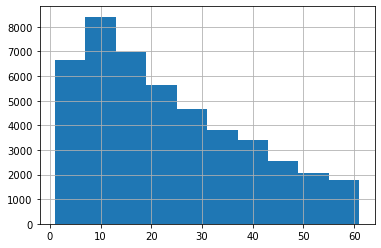

In [17]:
id_count = df_credit.groupby('ID')['STATUS'].count()
id_count.hist()

In [18]:
id_count.mean()

22.802544307926496

Each id has in average 22 credit records. I would like to summarize these 22 records in one line for each id, so i can join to the application records.

<AxesSubplot:>

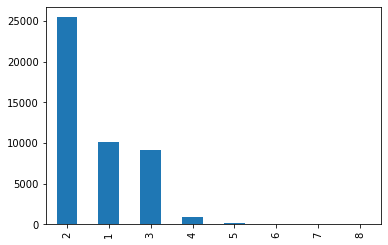

In [19]:
df_credit.groupby('ID')['STATUS'].nunique().value_counts().plot.bar()#.groupby(1).count()#.hist()

Most of the ID's have only two different credit records.

From the credit record i will take the last record (MONTHS_BALANCE=0) and the number of records for each status

In [20]:
df_lstatus = df_credit[df_credit['MONTHS_BALANCE']==0][["ID", "STATUS"]].set_index('ID')
df_lstatus.head()

,STATUS
ID,
5001711,X
5001712,C
5001713,X
5001714,X
5001715,X


In [21]:
df_lstatus.groupby('ID').size().value_counts()

1    33856
dtype: int64

Just one observation per ID

In [22]:
df_nstatus = df_credit.groupby(['ID', 'STATUS']).size().unstack(1).fillna(0)
df_nstatus.head()

STATUS,0,1,2,3,4,5,C,X
ID,,,,,,,,
5001711,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5001712,10.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0
5001713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
5001714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
5001715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0


In [23]:
df_nstatus.groupby(level=0).size().value_counts()

1    45985
dtype: int64

Because the credit records are incomplete (the ID ranges in both dfs don't match) we have to create our own target. We do this by identifying 'low risk' and 'high risk' credit users. We say a user is 'high risk' if during any month they are late on payments by 30 days or more, and 'low risk' otherwise. This is the target we will try to predict later.

In [24]:
df_nstatus['RISK'] = (df_nstatus.loc[:, ['1', '2', '3', '4', '5']].sum(1)>0)*1

In [25]:
df_nstatus.head()

STATUS,0,1,2,3,4,5,C,X,RISK
ID,,,,,,,,,
5001711,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
5001712,10.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0
5001713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0
5001714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0
5001715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0


## Join data

In [26]:
#df = pd.concat([df_application, df_lstatus, df_nstatus], axis=1)

I join the credit records (labeled dataset) to the application, so we can train a model.

In [27]:
#df = df_application.join(df_lstatus, how='left').join(df_nstatus, how='left')

In [28]:
df = df_application.join(df_nstatus['RISK'], how='inner')

In [29]:
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,RISK
ID,,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unknown,2.0,1
5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unknown,2.0,1
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0
5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0


In [30]:
df.tail()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,RISK
ID,,,,,,,,,,,,,,,,,,
5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,1
5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,1
5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,1
5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,1
5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 5008804 to 5150337
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          36457 non-null  object 
 1   FLAG_OWN_CAR         36457 non-null  object 
 2   FLAG_OWN_REALTY      36457 non-null  object 
 3   CNT_CHILDREN         36457 non-null  int64  
 4   AMT_INCOME_TOTAL     36457 non-null  float64
 5   NAME_INCOME_TYPE     36457 non-null  object 
 6   NAME_EDUCATION_TYPE  36457 non-null  object 
 7   NAME_FAMILY_STATUS   36457 non-null  object 
 8   NAME_HOUSING_TYPE    36457 non-null  object 
 9   DAYS_BIRTH           36457 non-null  int64  
 10  DAYS_EMPLOYED        36457 non-null  int64  
 11  FLAG_MOBIL           36457 non-null  int64  
 12  FLAG_WORK_PHONE      36457 non-null  int64  
 13  FLAG_PHONE           36457 non-null  int64  
 14  FLAG_EMAIL           36457 non-null  int64  
 15  OCCUPATION_TYPE      36457 n

In [32]:
df['RISK'].value_counts()

0    32166
1     4291
Name: RISK, dtype: int64

Maybe traing dataset should be only N=0 observations, and testing N=1.

In [33]:
df = df.reset_index()

## One Hot Enconding

In [34]:
  df.tail(4).T

,36453,36454,36455,36456
ID,5149834,5149838,5150049,5150337
CODE_GENDER,F,F,F,M
FLAG_OWN_CAR,N,N,N,N
FLAG_OWN_REALTY,Y,Y,Y,Y
CNT_CHILDREN,0,0,0,0
AMT_INCOME_TOTAL,157500.0,157500.0,283500.0,112500.0
NAME_INCOME_TYPE,Commercial associate,Pensioner,Working,Working
NAME_EDUCATION_TYPE,Higher education,Higher education,Secondary / secondary special,Secondary / secondary special
NAME_FAMILY_STATUS,Married,Married,Married,Single / not married
NAME_HOUSING_TYPE,House / apartment,House / apartment,House / apartment,Rented apartment


First I'll create a dicctionary for the type of variable.

In [35]:
dic_variables = {
    'Categorical': ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'], 
    'Binary': ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE','FLAG_EMAIL'], 
    'Numerical': ['CNT_CHILDREN', 'AMT_INCOME_TOTAL',  'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']
    
}

Let see how many categories exists for each variable

In [36]:
df[dic_variables['Categorical']].nunique()

CODE_GENDER             2
NAME_INCOME_TYPE        5
NAME_EDUCATION_TYPE     5
NAME_FAMILY_STATUS      5
NAME_HOUSING_TYPE       6
OCCUPATION_TYPE        19
dtype: int64

In [37]:
df[dic_variables['Categorical']].nunique().sum()

42

That will add 42 new variables to the dataset

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [39]:
categorical_transformer = OneHotEncoder(sparse=False, handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[("cat", categorical_transformer, dic_variables['Categorical'])],
    remainder='passthrough'
)

In [40]:
df_ohe = categorical_transformer.fit_transform(df[dic_variables['Categorical']])

In [41]:
ohe_names = categorical_transformer.get_feature_names() #get_feature_names_out()

C:\Users\bruno.gonzalez\Miniconda3\envs\pdsh\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [42]:
df_ohe = pd.DataFrame(df_ohe)
df_ohe.columns = ohe_names

In [43]:
df_ohe.shape

(36457, 42)

In [48]:
df_ohe

,x0_F,x0_M,x1_Commercial associate,x1_Pensioner,x1_State servant,x1_Student,x1_Working,x2_Academic degree,x2_Higher education,x2_Incomplete higher,...,x5_Low-skill Laborers,x5_Managers,x5_Medicine staff,x5_Private service staff,x5_Realty agents,x5_Sales staff,x5_Secretaries,x5_Security staff,x5_Unknown,x5_Waiters/barmen staff
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36453,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36454,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36455,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [49]:
df.shape

(36457, 19)

Put the dataset together

In [50]:
df_proc = pd.concat([
  df['ID'],
  df[dic_variables['Binary']].replace('Y',1).replace('N',0),
  df[dic_variables['Numerical']],
  df_ohe
  ],
axis=1)

In [51]:
df_proc.shape

(36457, 54)

In [52]:
df_proc.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,...,x5_Low-skill Laborers,x5_Managers,x5_Medicine staff,x5_Private service staff,x5_Realty agents,x5_Sales staff,x5_Secretaries,x5_Security staff,x5_Unknown,x5_Waiters/barmen staff
0,5008804,1,1,1,1,0,0,0,427500.0,-12005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5008805,1,1,1,1,0,0,0,427500.0,-12005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5008806,1,1,1,0,0,0,0,112500.0,-21474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5008808,0,1,1,0,1,1,0,270000.0,-19110,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5008809,0,1,1,0,1,1,0,270000.0,-19110,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Data Modeling

## Logistic Regession

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    df_proc[dic_variables['Binary']+dic_variables['Numerical']+list(ohe_names)],
    df['RISK'])

In [70]:
X_train.shape

(27342, 53)

In [78]:
y_test.value_counts()

0    8050
1    1065
Name: RISK, dtype: int64

In [71]:
m_log = LogisticRegression(random_state=0, verbose=10, n_jobs=2)

In [72]:
m_log.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    3.0s finished


LogisticRegression(n_jobs=2, random_state=0, verbose=10)

In [60]:
# from joblib import dump, load
# dump(m_log, 'log_model_01.joblib')

In [73]:
y_test_pred = m_log.predict(X_test)

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, classification_report

In [79]:
confusion = confusion_matrix(y_test, y_test_pred)
confusion

array([[8050,    0],
       [1065,    0]], dtype=int64)

In [90]:
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      8050
           1       0.00      0.00      0.00      1065

    accuracy                           0.88      9115
   macro avg       0.44      0.50      0.47      9115
weighted avg       0.78      0.88      0.83      9115



C:\Users\bruno.gonzalez\Miniconda3\envs\pdsh\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bruno.gonzalez\Miniconda3\envs\pdsh\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bruno.gonzalez\Miniconda3\envs\pdsh\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

## Logistic Regression with minmax scaller

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [93]:
pipe = Pipeline([('scaler', MinMaxScaler()),
                 ('reg', LogisticRegression(random_state=0, verbose=10, n_jobs=2))])

In [94]:
pipe.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    4.3s finished


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('reg',
                 LogisticRegression(n_jobs=2, random_state=0, verbose=10))])

In [95]:
y_test_pred = m_log.predict(X_test)

In [96]:
confusion = confusion_matrix(y_test, y_test_pred)
confusion

array([[8050,    0],
       [1065,    0]], dtype=int64)

In [97]:
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      8050
           1       0.00      0.00      0.00      1065

    accuracy                           0.88      9115
   macro avg       0.44      0.50      0.47      9115
weighted avg       0.78      0.88      0.83      9115



C:\Users\bruno.gonzalez\Miniconda3\envs\pdsh\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bruno.gonzalez\Miniconda3\envs\pdsh\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bruno.gonzalez\Miniconda3\envs\pdsh\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

## Logistic Regression with CV

In [103]:
from sklearn.model_selection import GridSearchCV

In [139]:
parameters = {'reg__C':[0.1, 1, 10], 'reg__max_iter': [100,200, 300]}

In [140]:
pipe = Pipeline([('scaler', MinMaxScaler()),
                 ('reg', LogisticRegression(random_state=0, n_jobs=2))])

In [141]:
gs_log = GridSearchCV(pipe, parameters, verbose=1, n_jobs=2, scoring='recall')

In [142]:
gs_log.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('reg',
                                        LogisticRegression(n_jobs=2,
                                                           random_state=0))]),
             n_jobs=2,
             param_grid={'reg__C': [0.1, 1, 10],
                         'reg__max_iter': [100, 200, 300]},
             scoring='recall', verbose=1)

In [143]:
gs_log.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('reg', LogisticRegression(C=10, n_jobs=2, random_state=0))])

In [144]:
y_test_pred = gs_log.predict(X_test)

In [145]:
confusion = confusion_matrix(y_test, y_test_pred)
confusion

array([[8050,    0],
       [1060,    5]], dtype=int64)

In [146]:
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      8050
           1       1.00      0.00      0.01      1065

    accuracy                           0.88      9115
   macro avg       0.94      0.50      0.47      9115
weighted avg       0.90      0.88      0.83      9115



## Gradient Boosting

In [147]:
from sklearn.ensemble import GradientBoostingClassifier

In [155]:
parameters = {'learning_rate':[0.1, 0.5], 'n_estimators': [100,300, 500]}

In [156]:
gs_gb = GridSearchCV(GradientBoostingClassifier(), parameters, verbose=1, n_jobs=2, scoring='recall')

In [157]:
gs_gb.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=2,
             param_grid={'learning_rate': [0.1, 0.5],
                         'n_estimators': [100, 300, 500]},
             scoring='recall', verbose=1)

In [158]:
gs_gb.best_estimator_

GradientBoostingClassifier(learning_rate=0.5, n_estimators=500)

In [159]:
y_test_pred = gs_gb.predict(X_test)

In [160]:
confusion = confusion_matrix(y_test, y_test_pred)
confusion

array([[7838,  212],
       [ 847,  218]], dtype=int64)

In [161]:
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      8050
           1       0.51      0.20      0.29      1065

    accuracy                           0.88      9115
   macro avg       0.70      0.59      0.61      9115
weighted avg       0.86      0.88      0.86      9115

